In [141]:
import pandas as pd
import matplotlib.pyplot as plt

In [142]:

def consolidate_model_performance(xlsx_path, algorithm_type):
    # Load the data from the Excel file
    df = pd.read_excel(xlsx_path)

    # Clean up column names by stripping any leading/trailing spaces
    df.columns = df.columns.str.strip()

    # Filter the DataFrame based on the algorithm type
    filtered_df = df[df['Algorithm'] == algorithm_type]

    # Initialize a list to store DataFrame slices before concatenation
    results_list = []

    # Group by model and find the maximum improvement and the corresponding threshold for each metric
    for model, group in filtered_df.groupby('Model'):
        for metric in ['Precision Improvement (%)', 'Recall Improvement (%)', 'F1 Improvement (%)']:
            max_value = group[metric].max()
            # Find the threshold at which the maximum improvement occurs
            max_threshold = group.loc[group[metric].idxmax(), 'Threshold'] if max_value > 0 else None
            # Create a dictionary of the results
            result_dict = {
                'Model': model,
                'Metric': metric,
                'Max Improvement': max_value,
                'Threshold at Max': max_threshold
            }
            # Convert the dictionary to a DataFrame and append it to the list
            results_list.append(pd.DataFrame([result_dict]))

    # Concatenate all DataFrame slices in the list into a single DataFrame
    results_df = pd.concat(results_list, ignore_index=True)

    # Reshape the DataFrame for better readability
    return results_df.pivot(index='Model', columns='Metric', values=['Max Improvement', 'Threshold at Max'])


In [143]:
plt.rcParams.update({
    'axes.titlesize': 18,   # Title size
    'axes.labelsize': 20,   # Axis label size
    'xtick.labelsize': 18,  # X-axis tick label size
    'ytick.labelsize': 18,  # Y-axis tick label size
    'legend.fontsize': 18   # Legend font size
})

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plot_improvements(xlsx_path, algorithm_type, commodity_type):
    # Load the data
    df = pd.read_excel(xlsx_path)

    # Clean up column names by stripping any leading/trailing spaces
    df.columns = df.columns.str.strip()

    # Filter based on the algorithm type
    df = df[df['Algorithm'] == algorithm_type]

    # Group data by 'Model'
    grouped = df.groupby('Model')

    # Plotting separate charts for Precision and Recall
    for name, group in grouped:
        # Remove NaN values and assume 0 if data is empty
        edcr_prec_data = group['Precision (EDCR)'].dropna().replace({np.nan: 0})
        edcr_rec_data = group['Recall (EDCR)'].dropna().replace({np.nan: 0})
        prec_data = group['Precision (Base Model)'].dropna().replace({np.nan: 0})
        rec_data = group['Recall (Base Model)'].dropna().replace({np.nan: 0})

        # Ensure that even empty or non-variable data is plotted as a flat line at 0
        if edcr_prec_data.empty:
            edcr_prec_data = pd.Series(0, index=group['Threshold'])
        if edcr_rec_data.empty:
            edcr_rec_data = pd.Series(0, index=group['Threshold'])
        if prec_data.empty:
            prec_data = pd.Series(0, index=group['Threshold'])
        if rec_data.empty:
            rec_data = pd.Series(0, index=group['Threshold'])

        fig, ax = plt.subplots(figsize=(6, 5))

        ax.set_xticks(np.arange(0.1, 0.6, 0.1))

        # Set plot properties
        ax.set_xlabel('Threshold', fontsize=16, fontweight='bold')
        ax.set_ylabel('Performance (Nickel)', fontsize=16, fontweight='bold')  # Unified label
        ax.tick_params(axis='y', labelcolor='black', labelsize=14)
        ax.tick_params(axis='x', labelcolor='black', labelsize=14)

        # Plot both Precision and Recall on the same axes
        ax.plot(group['Threshold'], edcr_prec_data, label='Precision (EDCR)', linestyle=(5, (10, 3)), color='red', linewidth=2)
        ax.plot(group['Threshold'], edcr_rec_data, label='Recall (EDCR)', linestyle='dashdot',color='blue', linewidth=2)
        ax.plot(group['Threshold'], prec_data, label='Precision (Base)',color='lightcoral')
        ax.plot(group['Threshold'], rec_data, label='Recall (Base)', linestyle='dashed',color='royalblue')

        # COUNT += 1
        # Title and grid
        plt.title(f'[{commodity_type}] Precision and Recall vs. Threshold for {name} using {algorithm_type}', fontsize=16)
        ax.grid(True)

        # Legend
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, ncol=2, fontsize=12)

        # Show plot
        fig.tight_layout()  # Adjust layout to make room for plot elements
        plt.show()


In [145]:
# TYPE = 'threshold'
ALGORITHM = [
            # 'correction', 
             'detection_correction'
             ]
# COMMODITY = 'nickel_shift_20'

In [146]:
# results_df = consolidate_model_performance(f'out/{TYPE}/{COMMODITY}_results.xlsx', 'detection_correction')
# results_df

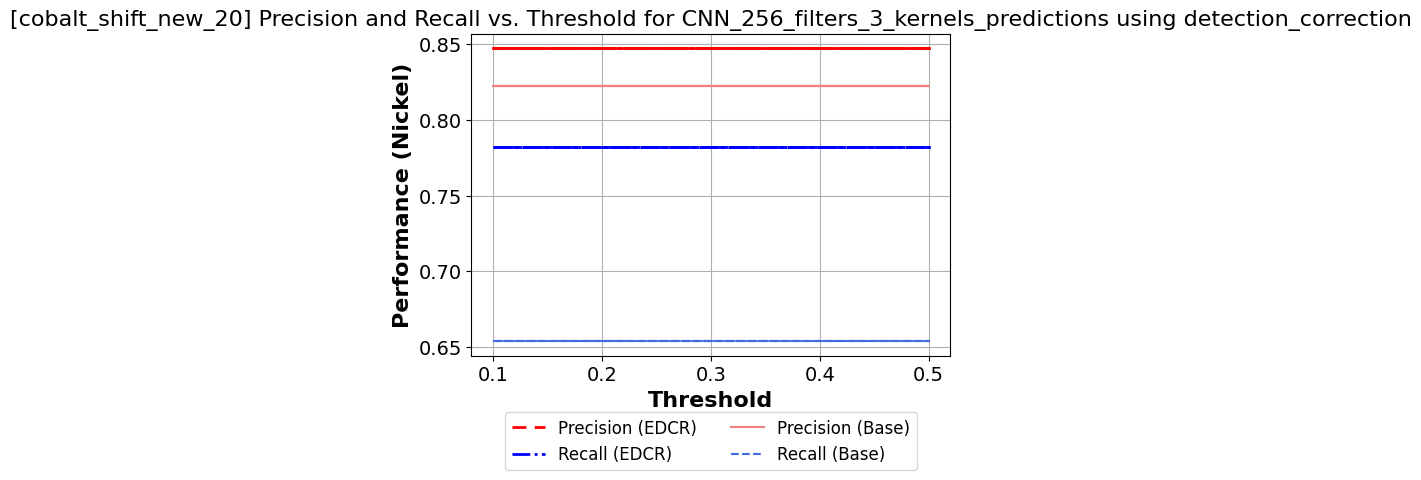

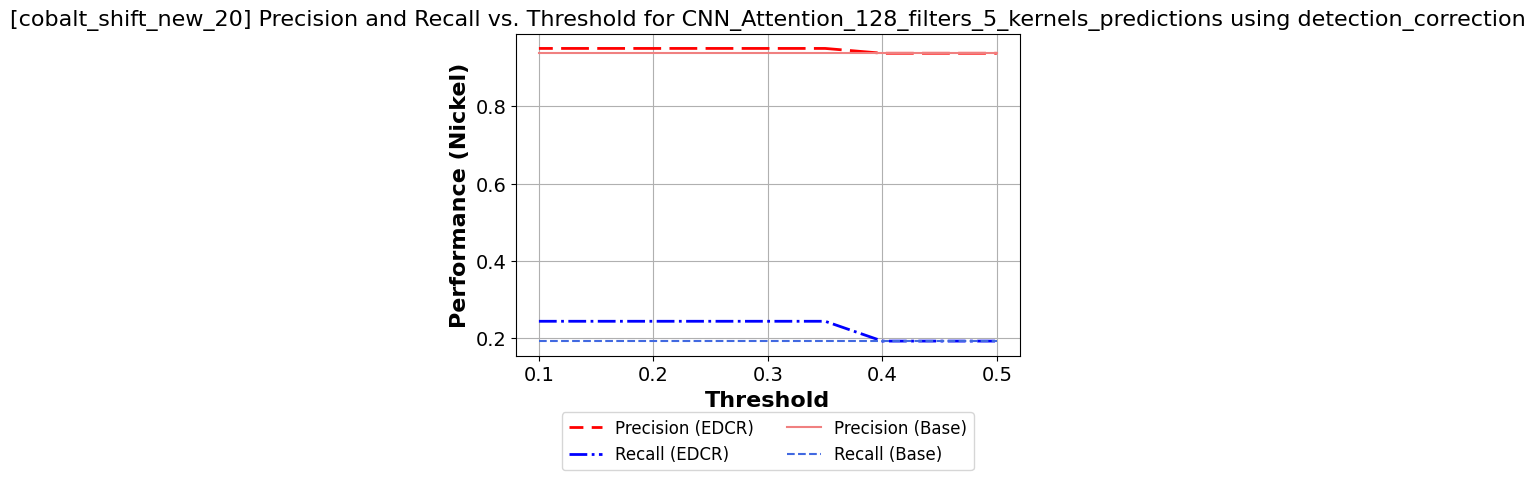

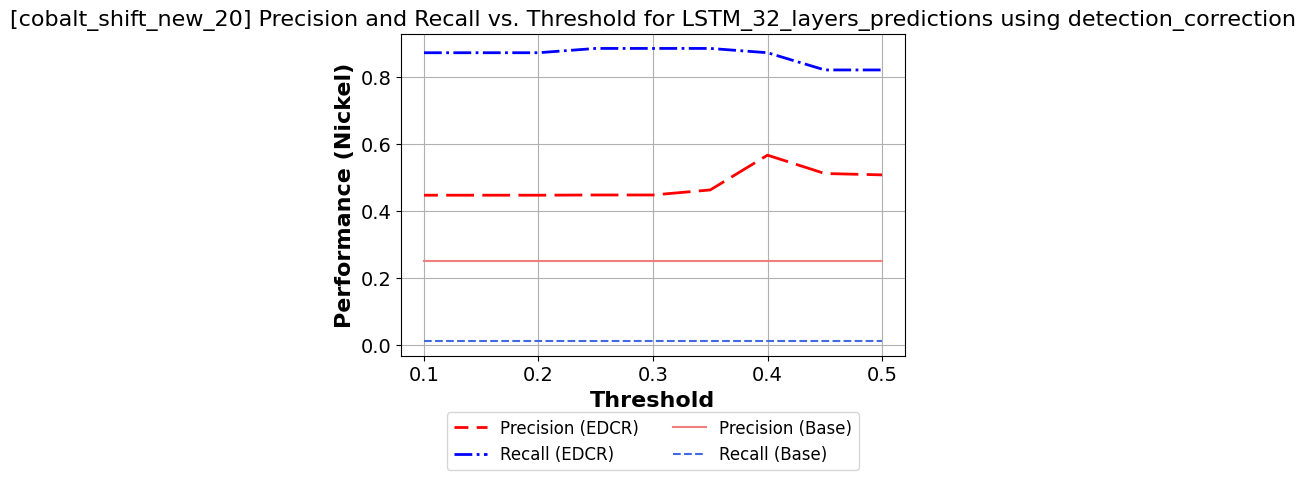

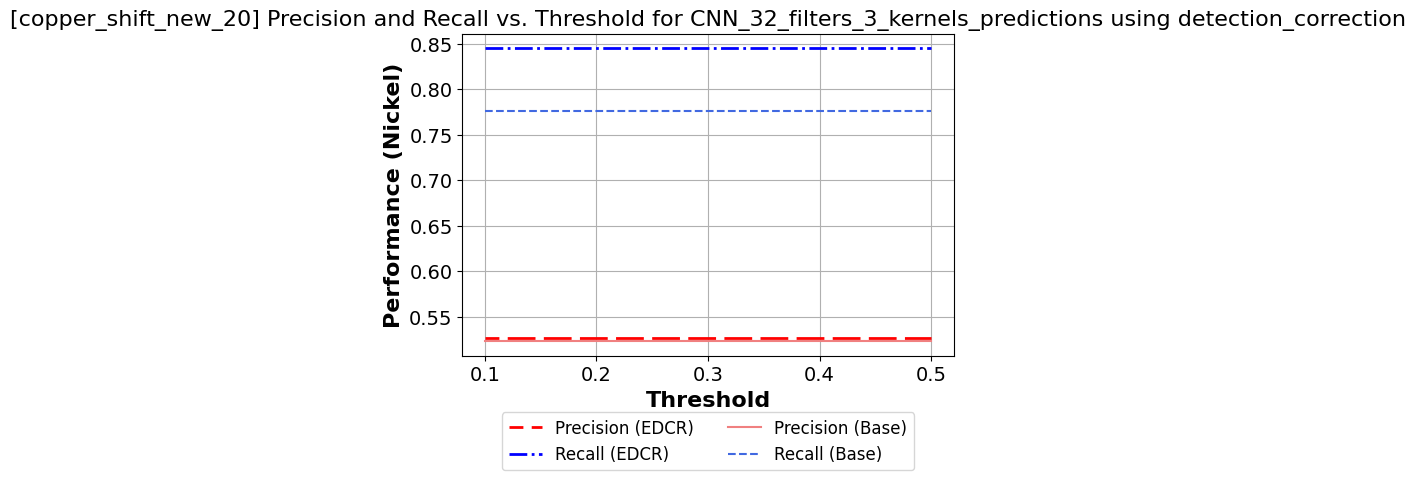

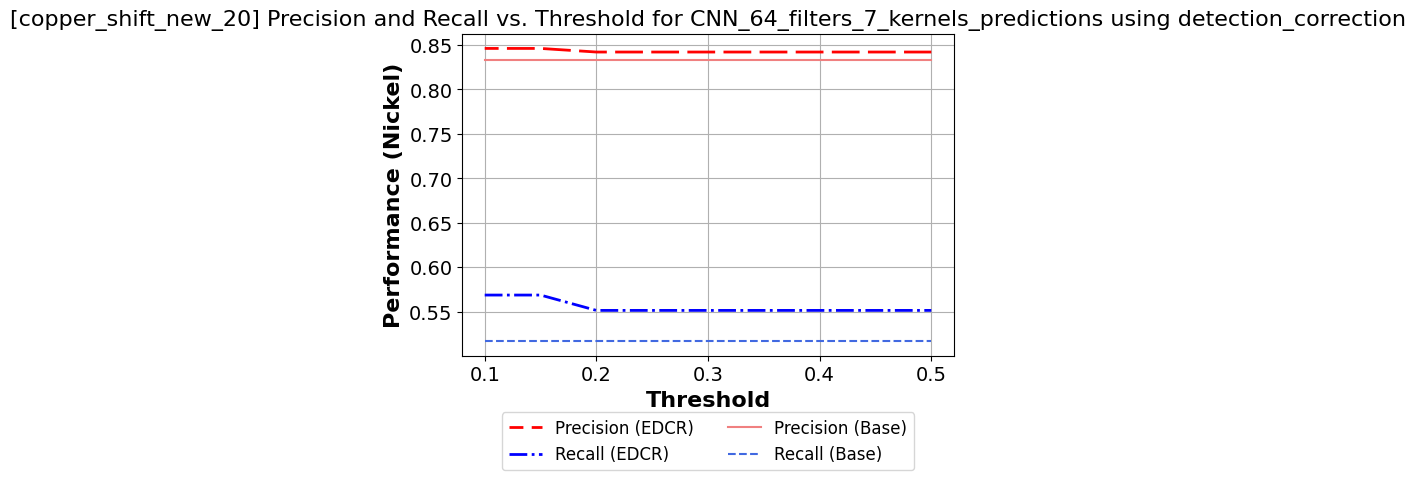

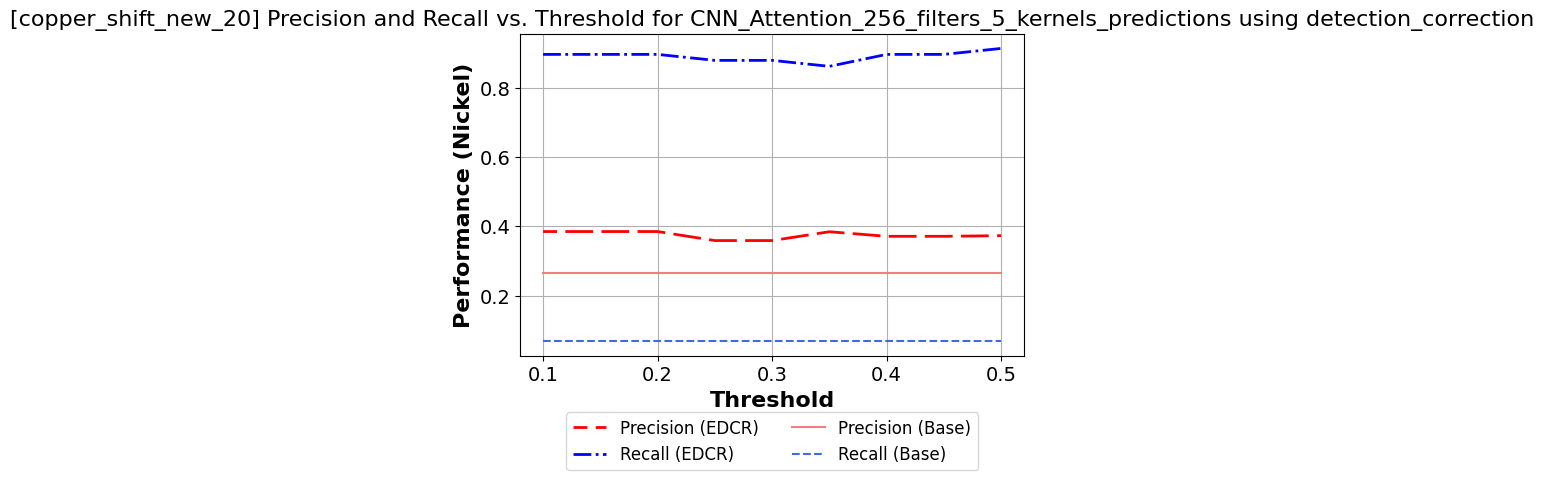

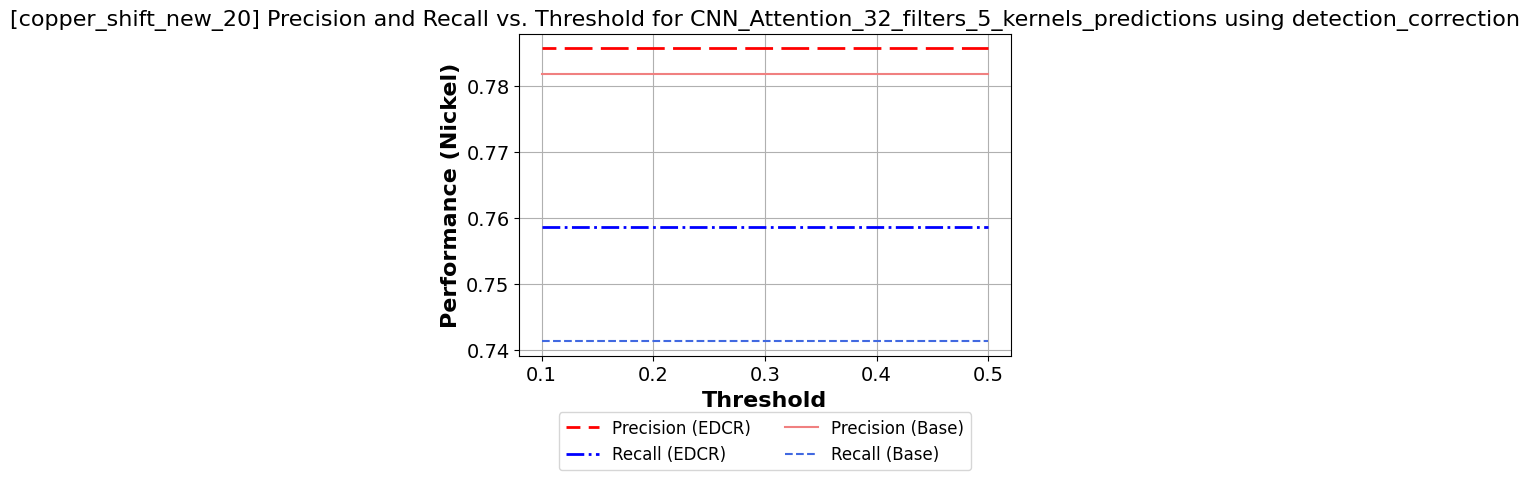

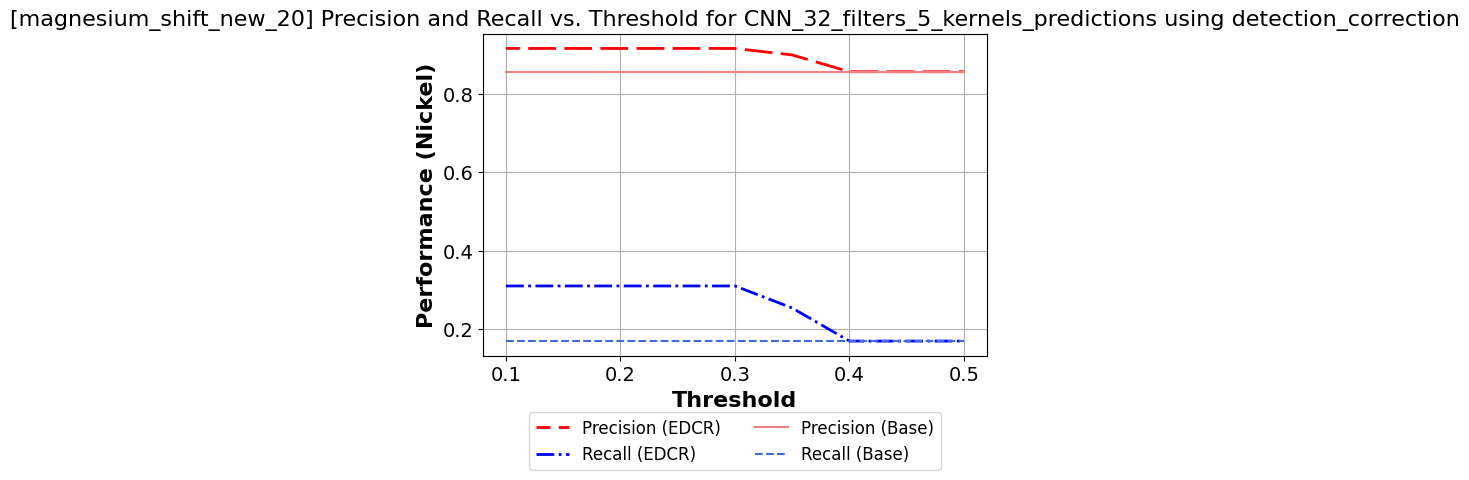

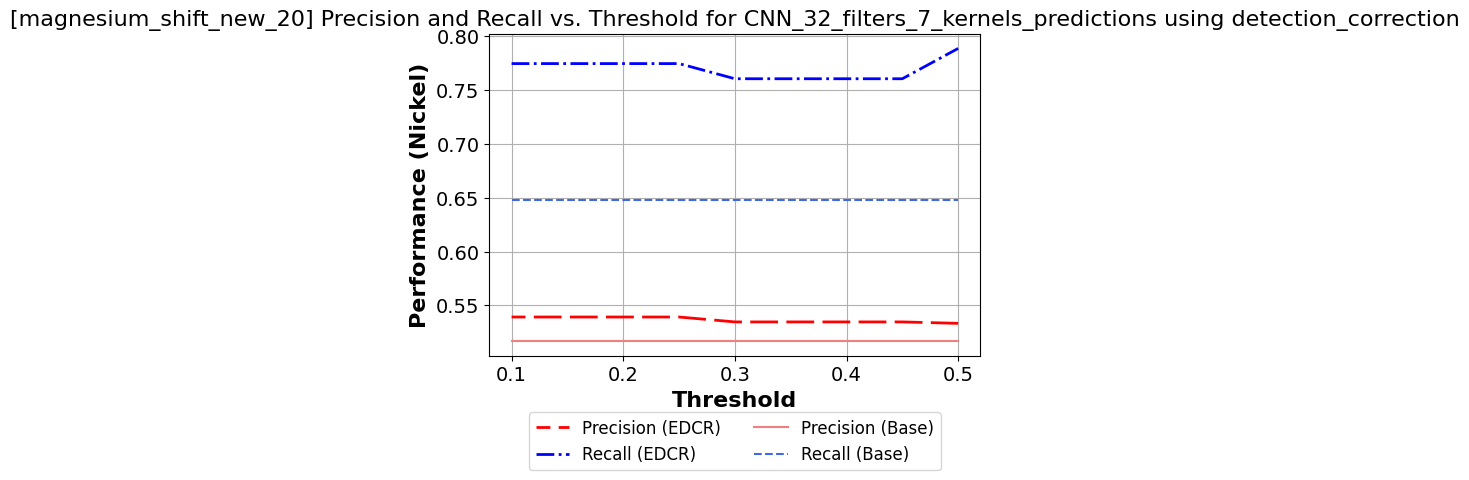

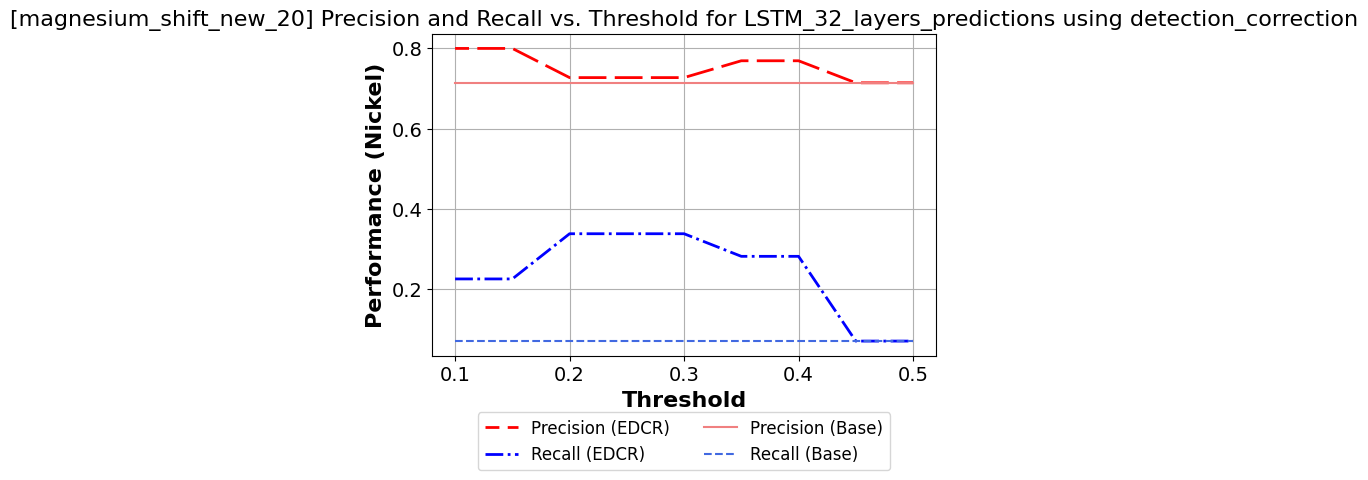

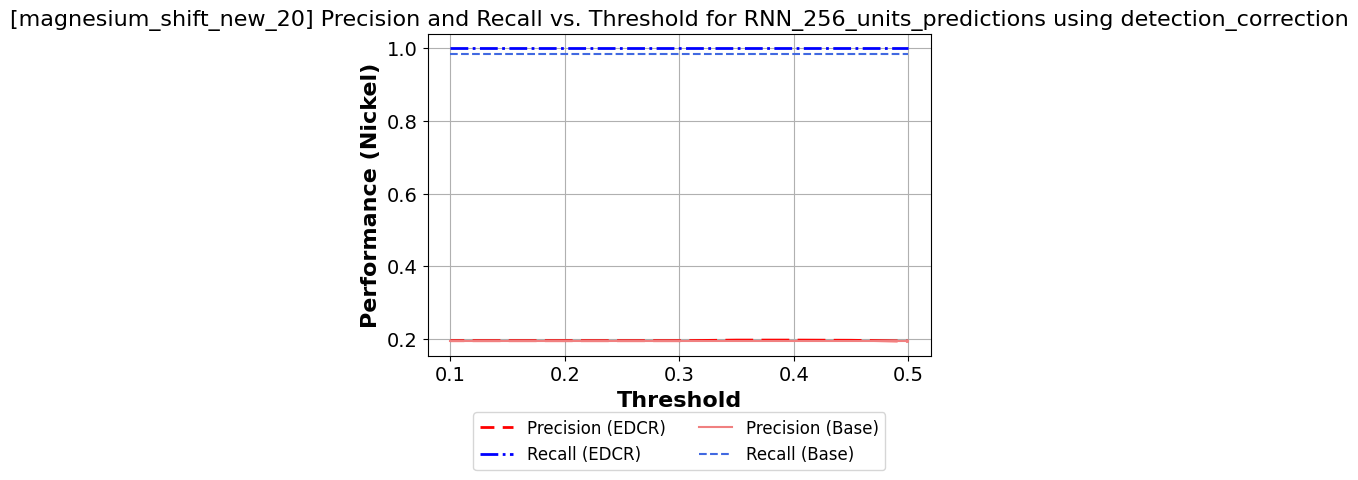

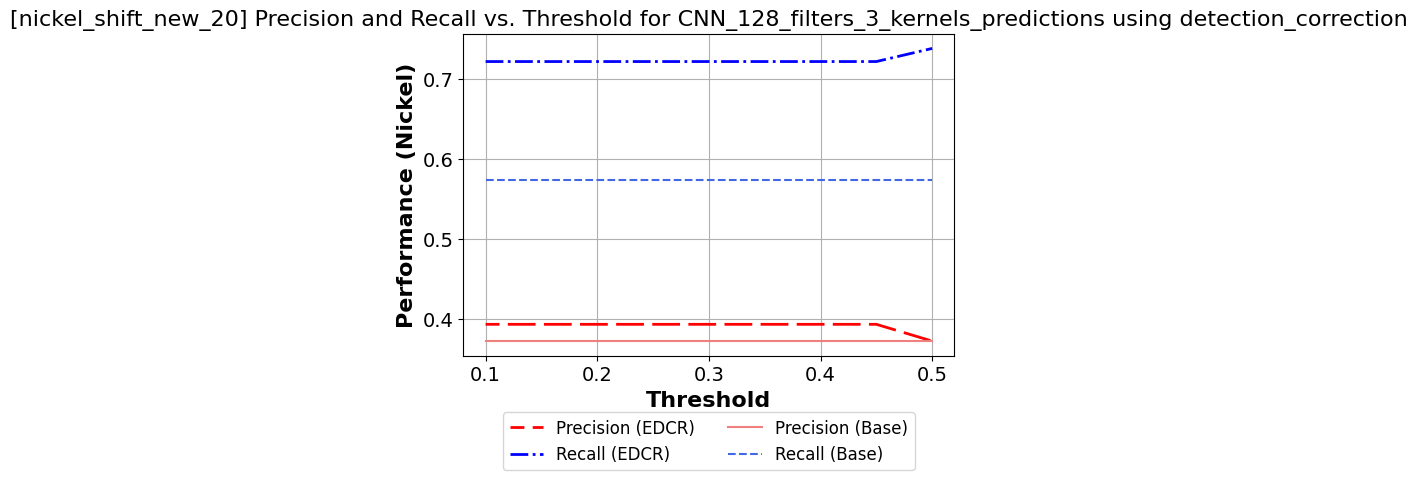

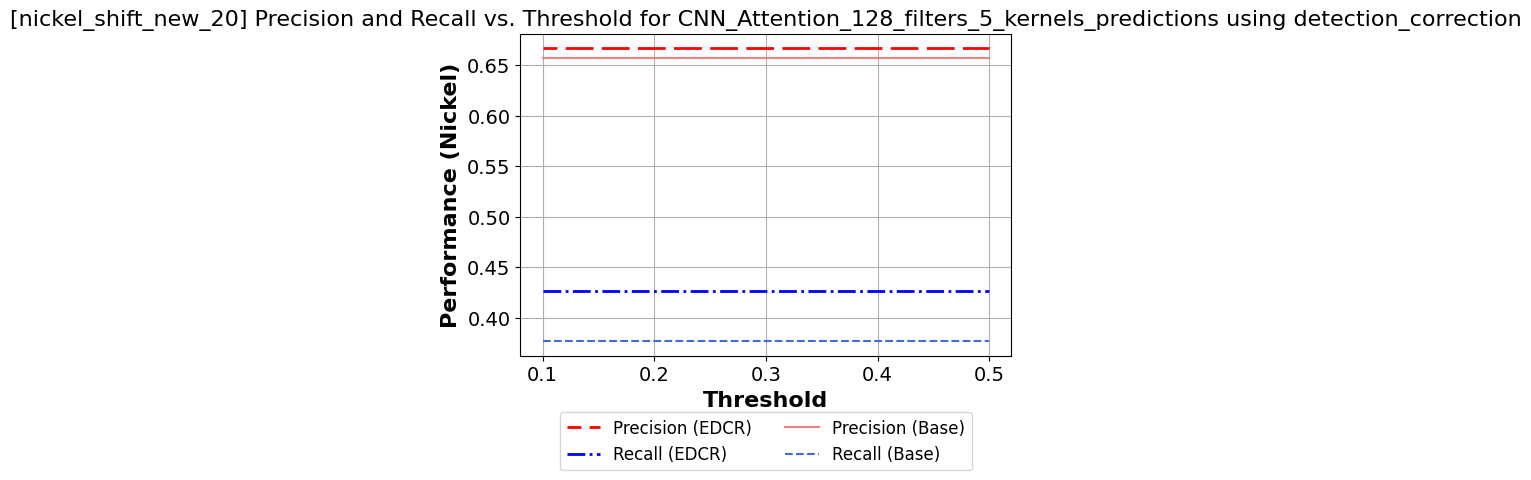

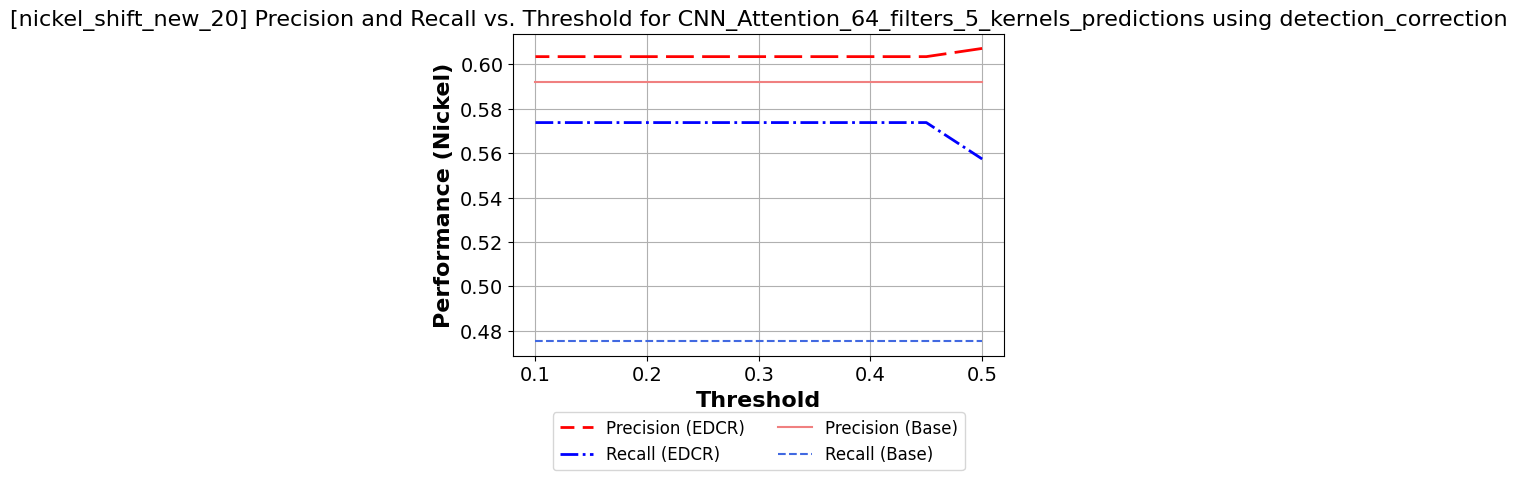

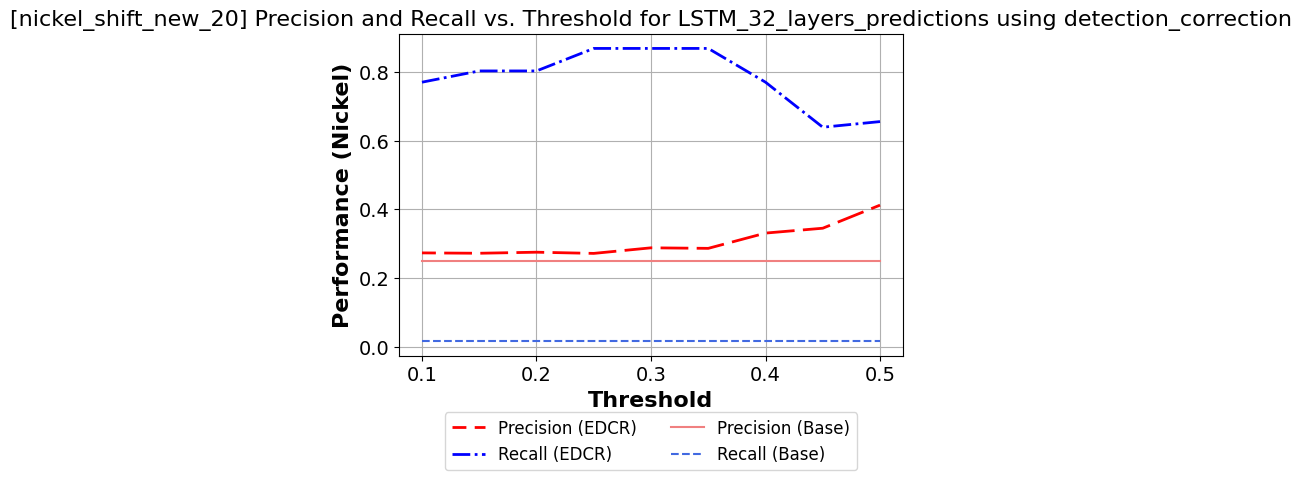

In [147]:
for COMMODITY in [
  'cobalt_shift_new_20', 'copper_shift_new_20', 'magnesium_shift_new_20', 'nickel_shift_new_20',
]:
    for ALGO in ALGORITHM:
        path = f'plot_threshold/{COMMODITY}_test_results.xlsx'
        plot_improvements(path, ALGO, COMMODITY)